# 10 Object Detectors 

<a href="http://colab.research.google.com/drive/1AVgdWQ8LTrn6MrGyamKSUT17n_F_cCG2?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)

In this notebook, 10 well known pre-trained object detectors are loaded and used in a standard and easy way.

1. YOLOF: You Only Look One-level Feature (2021)
2. YOLOX: Exceeding YOLO Series in 2021 (2021)
4. Deformable DETR: Deformable Transformers for End-to-End Object Detection (2021)
4. SparseR-CNN: End-to-End Object Detection with Learnable Proposals (2020)
5. VarifocalNet: An IoU-aware Dense Object Detector (2020)
6. PAA: Probabilistic Anchor Assignment with IoU Prediction for Object Detection (2020)
7. DETR: End-to-End Object Detection with Transformers (2020)
8. SABL: Side-Aware Boundary Localization for More Precise Object Detection (2020)
9. ATSS: Bridging the Gap Between Anchor-based and Anchor-free Detection via Adaptive Training Sample Selection (2019)
10. Double Heads: Rethinking Classification and Localization for Object Detection (2019)





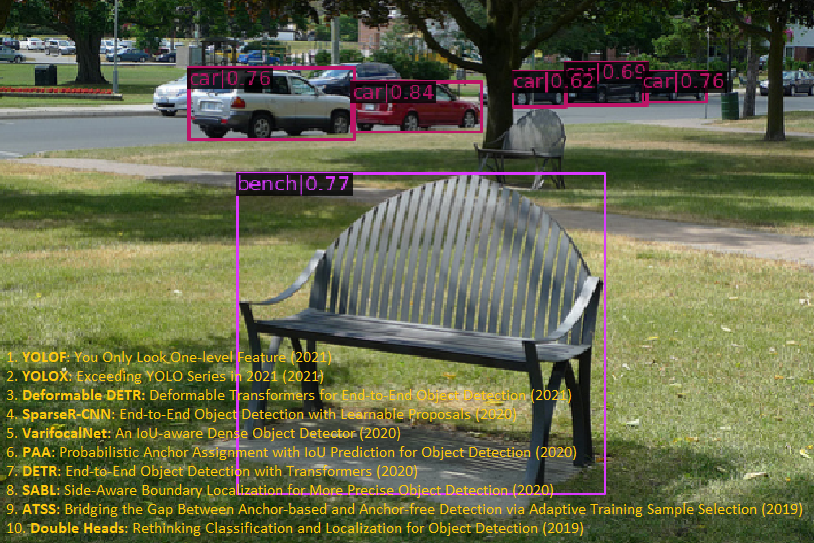

## Setup

In [ ]:
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

Cloning into 'mmdetection'...
remote: Enumerating objects: 23060, done.
remote: Total 23060 (delta 0), reused 0 (delta 0), pack-reused 23060
Receiving objects: 100% (23060/23060), 25.80 MiB | 26.11 MiB/s, done.
Resolving deltas: 100% (16163/16163), done.
/content/mmdetection


In [ ]:
!pip install openmim

  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42503 sha256=365f659d9acc47eed6af1bcb0abe8a172357b888eee59878d74ecab609f4927f
  Stored in directory: /root/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
Successfully built openmim


In [ ]:
!mim install mmdet

installing mmdet from https://github.com/open-mmlab/mmdetection.git.
Cloning into '/tmp/tmp1wayoab1/mmdetection'...
remote: Enumerating objects: 23060, done.
remote: Total 23060 (delta 0), reused 0 (delta 0), pack-reused 23060
Receiving objects: 100% (23060/23060), 25.81 MiB | 26.19 MiB/s, done.
Resolving deltas: 100% (16172/16172), done.
Note: checking out '98949809b7179fab9391663ee5a4ab5978425f90'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

installing dependency: mmcv-full
installing mmcv-full from wheel.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████

In [ ]:
!pip install tqdm

In [ ]:
import numpy as np
import os
import pandas as pd
import torch, torchvision
import mmcv
import mmdet
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmcv import Config
from mmdet.apis import inference_detector, init_detector, set_random_seed, show_result_pyplot
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
from torchsummary import summary

In [ ]:
# Check Pytorch installation
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
print(mmdet.__version__)

# Check mmcv installation
print(get_compiling_cuda_version())
print(get_compiler_version())

1.10.0+cu111 True
2.21.0
11.1
GCC 7.3


## Download Checkpoints

In [ ]:
!mkdir checkpoints

# YOLOF: https://github.com/open-mmlab/mmdetection/tree/master/configs/yolof
!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolof/yolof_r50_c5_8x8_1x_coco/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth \
      -O checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth

# YOLOX: https://github.com/open-mmlab/mmdetection/tree/master/configs/yolox
!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth \
      -O checkpoints/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


# Sparse R-CNN: https://github.com/open-mmlab/mmdetection/tree/master/configs/sparse_rcnn
!wget -c https://download.openmmlab.com/mmdetection/v2.0/sparse_rcnn/sparse_rcnn_r50_fpn_1x_coco/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth \
      -O checkpoints/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth

# VarifocalNet: https://github.com/open-mmlab/mmdetection/tree/master/configs/vfnet
!wget -c https://download.openmmlab.com/mmdetection/v2.0/vfnet/vfnet_r50_fpn_1x_coco/vfnet_r50_fpn_1x_coco_20201027-38db6f58.pth \
      -O checkpoints/vfnet_r50_fpn_1x_coco_20201027-38db6f58.pth

# PAA: https://github.com/open-mmlab/mmdetection/tree/master/configs/paa
!wget -c https://download.openmmlab.com/mmdetection/v2.0/paa/paa_r50_fpn_1x_coco/paa_r50_fpn_1x_coco_20200821-936edec3.pth \
      -O checkpoints/paa_r50_fpn_1x_coco_20200821-936edec3.pth

# DETR: https://github.com/open-mmlab/mmdetection/tree/master/configs/detr
!wget -c https://download.openmmlab.com/mmdetection/v2.0/detr/detr_r50_8x2_150e_coco/detr_r50_8x2_150e_coco_20201130_194835-2c4b8974.pth \
      -O checkpoints/detr_r50_8x2_150e_coco_20201130_194835-2c4b8974.pth

# Deformable DETR: https://github.com/open-mmlab/mmdetection/tree/master/configs/deformable_detr
!wget -c https://download.openmmlab.com/mmdetection/v2.0/deformable_detr/deformable_detr_r50_16x2_50e_coco/deformable_detr_r50_16x2_50e_coco_20210419_220030-a12b9512.pth \
      -O checkpoints/deformable_detr_r50_16x2_50e_coco_20210419_220030-a12b9512.pth

# SABL: https://github.com/open-mmlab/mmdetection/tree/master/configs/sabl
!wget -c https://download.openmmlab.com/mmdetection/v2.0/sabl/sabl_faster_rcnn_r50_fpn_1x_coco/sabl_faster_rcnn_r50_fpn_1x_coco-e867595b.pth \
      -O checkpoints/sabl_faster_rcnn_r50_fpn_1x_coco-e867595b.pth

# ATSS: https://github.com/open-mmlab/mmdetection/tree/master/configs/atss
!wget -c https://download.openmmlab.com/mmdetection/v2.0/atss/atss_r50_fpn_1x_coco/atss_r50_fpn_1x_coco_20200209-985f7bd0.pth \
      -O checkpoints/atss_r50_fpn_1x_coco_20200209-985f7bd0.pth

# Double Heads: https://github.com/open-mmlab/mmdetection/tree/master/configs/double_heads
!wget -c https://download.openmmlab.com/mmdetection/v2.0/double_heads/dh_faster_rcnn_r50_fpn_1x_coco/dh_faster_rcnn_r50_fpn_1x_coco_20200130-586b67df.pth \
      -O checkpoints/dh_faster_rcnn_r50_fpn_1x_coco_20200130-586b67df.pth


--2022-02-12 10:58:32--  https://download.openmmlab.com/mmdetection/v2.0/yolof/yolof_r50_c5_8x8_1x_coco/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176992053 (169M) [application/octet-stream]
Saving to: ‘checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth’

checkpoints/yolof_r 100%[===================>] 168.79M  6.20MB/s    in 26s     

2022-02-12 10:58:59 (6.60 MB/s) - ‘checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth’ saved [176992053/176992053]

--2022-02-12 10:58:59--  https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.open

In [ ]:
# Select a test image
img = 'demo/demo.jpg'

In [ ]:
# model and config lists 
config_list = ['./configs/yolof/yolof_r50_c5_8x8_1x_coco.py',
               './configs/yolox/yolox_tiny_8x8_300e_coco.py',
               './configs/sparse_rcnn/sparse_rcnn_r50_fpn_1x_coco.py',
               './configs/vfnet/vfnet_r50_fpn_1x_coco.py',
               './configs/paa/paa_r50_fpn_1x_coco.py',
               './configs/detr/detr_r50_8x2_150e_coco.py',
               './configs/deformable_detr/deformable_detr_r50_16x2_50e_coco.py',
               './configs/sabl/sabl_faster_rcnn_r50_fpn_1x_coco.py',
               './configs/atss/atss_r50_fpn_1x_coco.py',
               './configs/double_heads/dh_faster_rcnn_r50_fpn_1x_coco.py']


checkpoint_list = ['./checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth',
                   './checkpoints/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth',
                   './checkpoints/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth',
                   './checkpoints/vfnet_r50_fpn_1x_coco_20201027-38db6f58.pth',
                   './checkpoints/paa_r50_fpn_1x_coco_20200821-936edec3.pth',
                   './checkpoints/detr_r50_8x2_150e_coco_20201130_194835-2c4b8974.pth',
                   './checkpoints/deformable_detr_r50_16x2_50e_coco_20210419_220030-a12b9512.pth',
                   './checkpoints/sabl_faster_rcnn_r50_fpn_1x_coco-e867595b.pth',
                   './checkpoints/atss_r50_fpn_1x_coco_20200209-985f7bd0.pth',
                   './checkpoints/dh_faster_rcnn_r50_fpn_1x_coco_20200130-586b67df.pth']

detectors_names = ['YOLOF: You Only Look One-level Feature (2021)',
                   'YOLOX: Exceeding YOLO Series in 2021 (2021)',
                   'SparseR-CNN: End-to-End Object Detection with Learnable Proposals (2020)',
                   'VarifocalNet: An IoU-aware Dense Object Detector (2020)',
                   'PAA: Probabilistic Anchor Assignment with IoU Prediction for Object Detection (2020)',
                   'DETR: End-to-End Object Detection with Transformers (2020)',
                   'Deformable DETR: Deformable Transformers for End-to-End Object Detection (2021)',
                   'SABL: Side-Aware Boundary Localization for More Precise Object Detection (2020)',
                   'ATSS: Bridging the Gap Between Anchor-based and Anchor-free Detection via Adaptive Training Sample Selection (2019)',
                   'Double Heads: Rethinking Classification and Localization for Object Detection (2019)']


load checkpoint from local path: ./checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth


/content/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


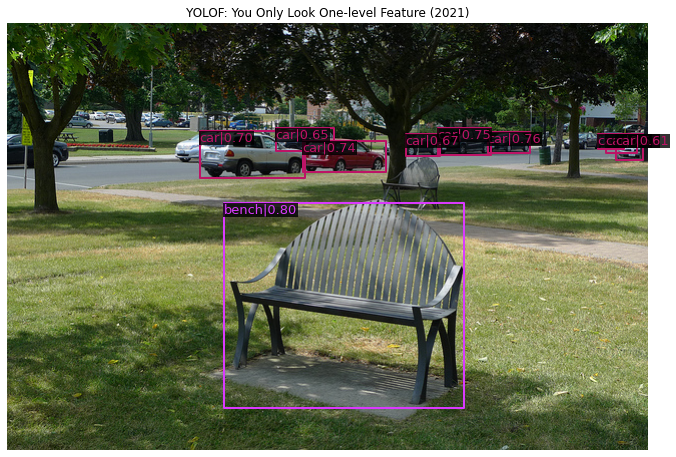

load checkpoint from local path: ./checkpoints/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/mmdetection/mmdet/models/dense_heads/yolox_head.py:285: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  scale_factors).unsqueeze(1)


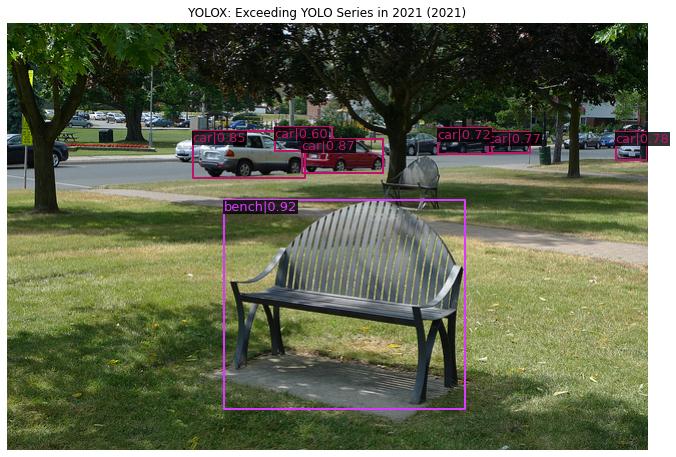

load checkpoint from local path: ./checkpoints/sparse_rcnn_r50_fpn_1x_coco_20201222_214453-dc79b137.pth


/content/mmdetection/mmdet/models/roi_heads/sparse_roi_head.py:356: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_classes]


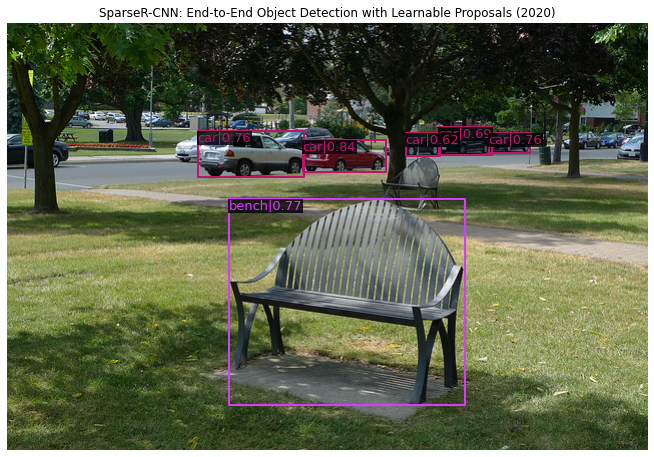

load checkpoint from local path: ./checkpoints/vfnet_r50_fpn_1x_coco_20201027-38db6f58.pth


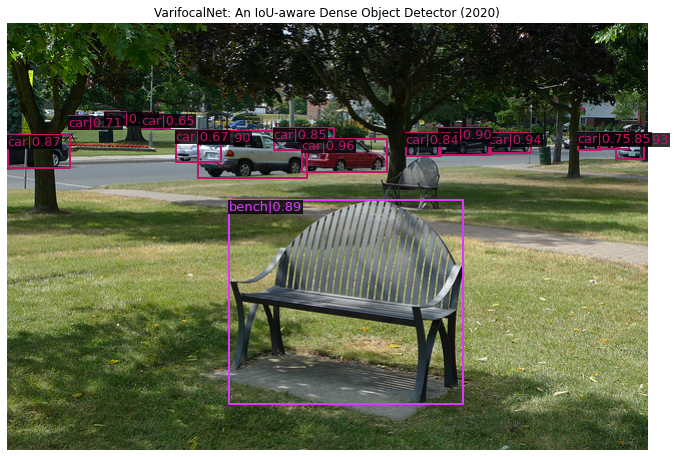

/content/mmdetection/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


load checkpoint from local path: ./checkpoints/paa_r50_fpn_1x_coco_20200821-936edec3.pth


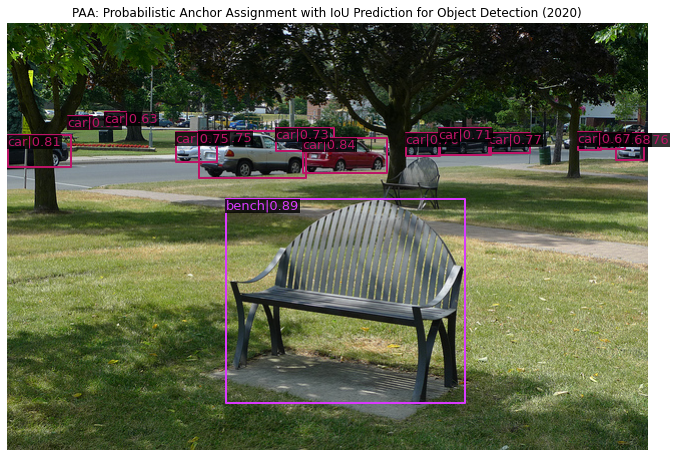

load checkpoint from local path: ./checkpoints/detr_r50_8x2_150e_coco_20201130_194835-2c4b8974.pth


/content/mmdetection/mmdet/models/utils/positional_encoding.py:81: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature**(2 * (dim_t // 2) / self.num_feats)


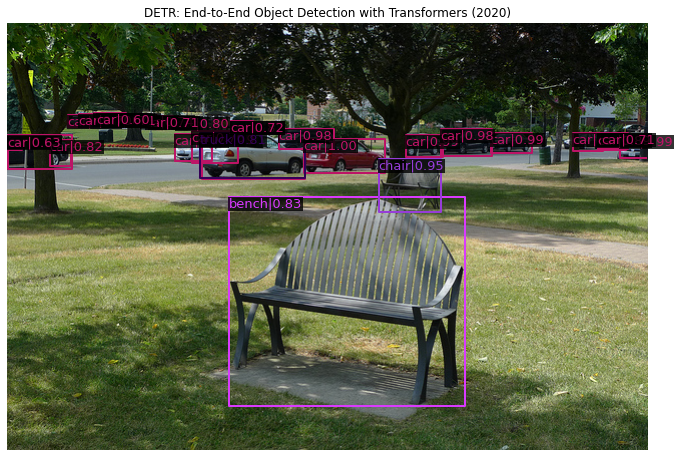

load checkpoint from local path: ./checkpoints/deformable_detr_r50_16x2_50e_coco_20210419_220030-a12b9512.pth


/content/mmdetection/mmdet/models/dense_heads/detr_head.py:666: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bbox_index = indexes // self.num_classes


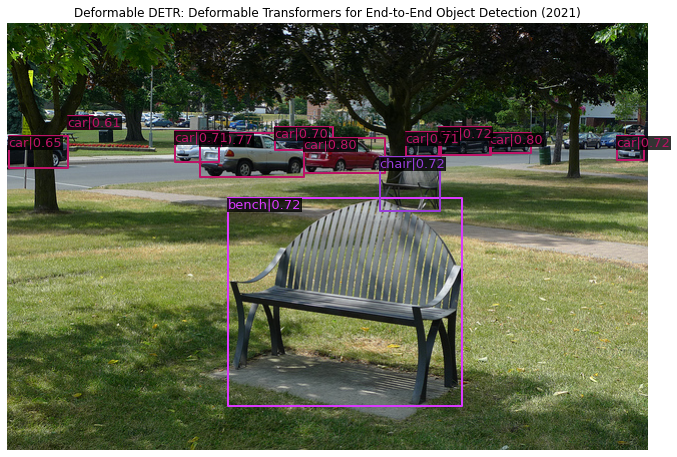

load checkpoint from local path: ./checkpoints/sabl_faster_rcnn_r50_fpn_1x_coco-e867595b.pth


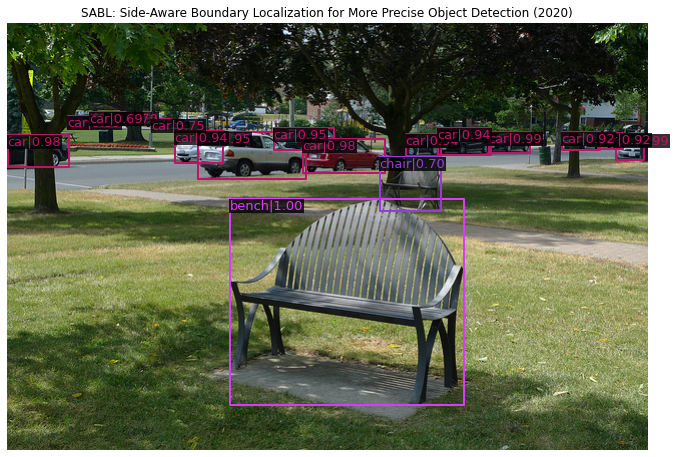

load checkpoint from local path: ./checkpoints/atss_r50_fpn_1x_coco_20200209-985f7bd0.pth


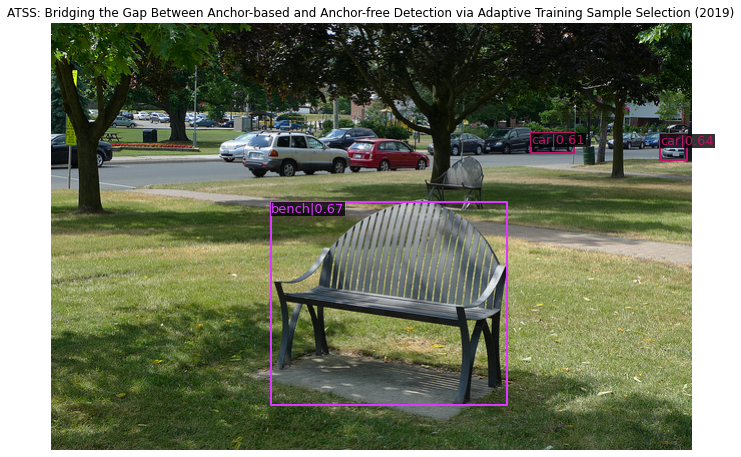

load checkpoint from local path: ./checkpoints/dh_faster_rcnn_r50_fpn_1x_coco_20200130-586b67df.pth


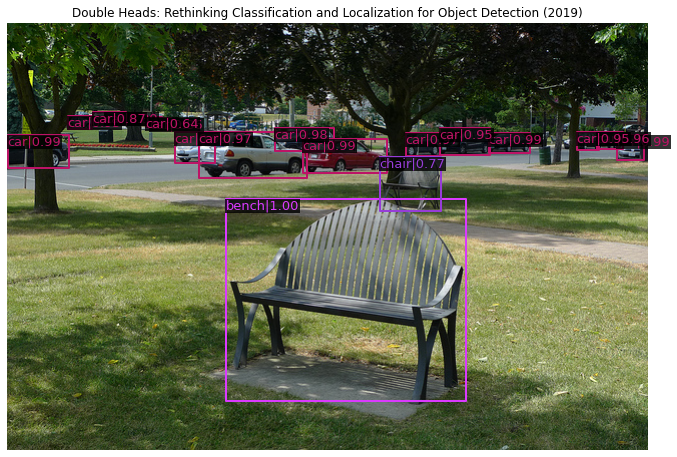

In [ ]:
for m_name, config, checkpoint in zip(detectors_names, config_list, checkpoint_list):
  model = init_detector(config, checkpoint, device='cuda:0')
  result = inference_detector(model, img)
  show_result_pyplot(model, img, result, title=m_name, score_thr=0.6)